# 数ベクトル空間における線形独立性

- $m,n\geq 1$ : 自然数

**問題** 数ベクトルの集合$\{\boldsymbol{x}_1,\boldsymbol{x}_2,\dots,\boldsymbol{x}_n\}\subset \Bbbk^m$は線型独立かどうか判定せよ。

**方針** 行列 $X=\begin{bmatrix}\boldsymbol{x}_1 & \boldsymbol{x}_2 & \dots & \boldsymbol{x}_n\end{bmatrix}\in M_{m,n}(\Bbbk)$に対して、行標準形$\mathrm{rref}(X)$を計算することで、$\mathrm{Ker}(X)=\{\boldsymbol{0}\}$であるかどうかを判定する。

- 行基本変形で、$\mathrm{Ker}\left(X\right)$は変わらない。
- $\mathrm{Ker}\left(X\right)=\{\boldsymbol{0}\}$であるための必要十分条件は、
$$
\mathrm{rref}(X)=\begin{bmatrix}
E_n \\ O_{m-n,n}
\end{bmatrix}\in M_{m,n}(\Bbbk)
$$
となることである。



In [46]:
from sympy import *;
import random
init_printing()

def rand_reduced_row_echelon_matrix(m, n, pivot_columns, d):
    pivot_columns = [p - 1 for p in pivot_columns]
    
    if len(pivot_columns) > min(m, n):
        raise ValueError("pivot_columnsの長さは m と n の最小値を超えてはいけません。")
    
    while True:
        # m x nのランダムな整数行列を生成します。
        matrix = Matrix([[random.randint(-d, d) for _ in range(n)] for _ in range(m)])

        # 行簡約形の主成分の位置を取得します。
        rref_matrix, rref_pivots = matrix.rref()

        # 主成分の位置が指定された位置と一致するかを確認します。
        if list(rref_pivots) == pivot_columns:
            return matrix

def columns(matrix):
    matrix_cols =[matrix[:, i] for i in range(matrix.cols)]
    return matrix_cols

In [47]:
def gauss_jordan_elimination(matrix):
    A = matrix.copy()
    
    display(A)
    
    rows, cols = A.shape

    r = 0
    for c in range(cols):
        pivot_row = None
        for i in range(r, rows):
            if A[i, c] != 0:
                pivot_row = i
                break

        if pivot_row is None:
            continue

        A.row_swap(r, pivot_row)

        pivot = A[r, c]
        if pivot == 0:
            continue

        A[r, :] = A[r, :] / pivot

        for i in range(rows):
            if i == r:
                continue
            factor = A[i, c]
            A[i, :] = A[i, :] - factor * A[r, :]

        display(A)

        r += 1
        if r == rows:
            break

    return

In [48]:
A1=rand_reduced_row_echelon_matrix(3,3,[1,2],3);
A2=rand_reduced_row_echelon_matrix(3,3,[1,2,3],2);

**問題1** 以下の数ベクトルの集合が線型独立かどうか判定せよ。

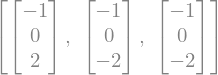

In [49]:
columns(A1)

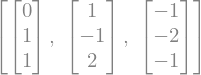

In [50]:
columns(A2)

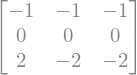

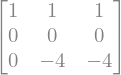

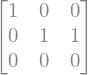

In [51]:
gauss_jordan_elimination(A1)

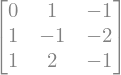

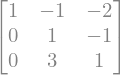

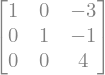

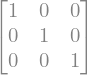

In [52]:
gauss_jordan_elimination(A2)

In [53]:
B1=rand_reduced_row_echelon_matrix(4,3,[1,2,3],2);
B2=rand_reduced_row_echelon_matrix(4,3,[1,2],3);

**問題2** 以下の数ベクトルの集合が線型独立かどうか判定せよ。

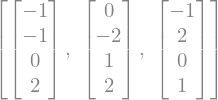

In [54]:
columns(B1)

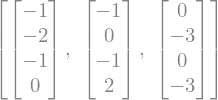

In [55]:
columns(B2)

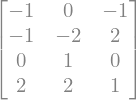

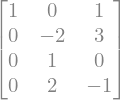

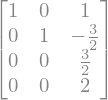

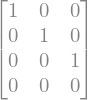

In [56]:
gauss_jordan_elimination(B1)

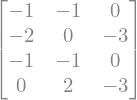

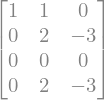

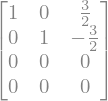

In [57]:
gauss_jordan_elimination(B2)

In [58]:
C1=rand_reduced_row_echelon_matrix(4,4,[1,2,3],3);
C2=rand_reduced_row_echelon_matrix(4,4,[1,2,3,4],2);
C3=rand_reduced_row_echelon_matrix(4,4,[1,2,4],3);

**問題3** 以下の数ベクトルの集合が線型独立かどうか判定せよ。

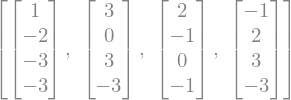

In [59]:
columns(C1)

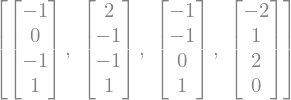

In [60]:
columns(C2)

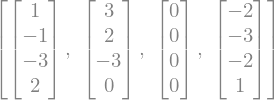

In [61]:
columns(C3)

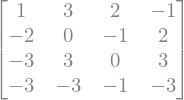

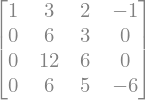

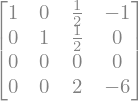

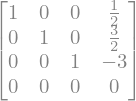

In [62]:
gauss_jordan_elimination(C1)

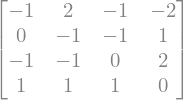

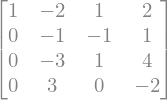

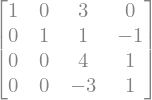

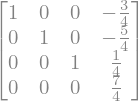

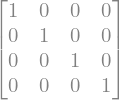

In [63]:
gauss_jordan_elimination(C2)

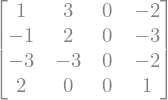

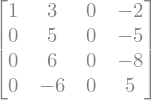

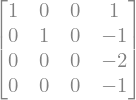

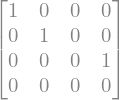

In [64]:
gauss_jordan_elimination(C3)